In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LogFormatter
import matplotlib.patheffects as PathEffects

import matplotlib.style as style
# Use your custom style
style.use('/Users/crc/Dropbox (MIT)/scientific_custom.mplstyle')

# Set the font properties directly in the script
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 12

            Method Substrate  Emission Wavelength (nm)  Period(nm)  P/Lambda  \
0     Direct litho   LSO (?)                       420         640  1.523810   
1     Direct litho   LSO (?)                       420         640  1.523810   
2     Direct litho   LSO (?)                       420         640  1.523810   
3  Nano-imprinting      LYSO                       420         700  1.666667   
4    Self-Assembly      LYSO                       420         414  0.985714   

  Dimensions  Surface (mm2)            Metasurface Material  LY Gain  \
0  1.2x2.6x6           15.6                   Si3N4 pillars     1.31   
1  1.2x2.6x7           16.8                   Si3N4 pillars     1.30   
2  1.2x2.6x8           20.8                   Si3N4 pillars     1.56   
3      1x1x1            1.0  Hexagonal cones polymer n=1.68     1.05   
4    20x10x1          200.0          PMMA sphere + TiO2 ALD     2.49   

                 Ref                                          Full Ref2  
0  Knapitsch

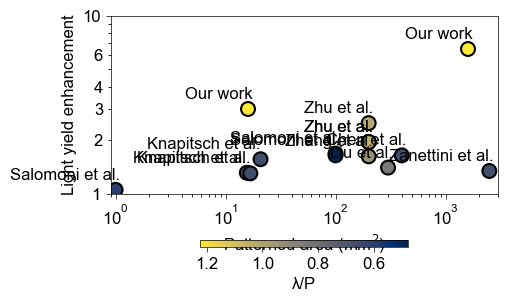

In [7]:
# Load the Excel file and skip the first two rows
file_path = './Reference Figure Light Yield_corrected.xlsx'
df = pd.read_excel(file_path, skiprows=1)

# Display the first few rows of the dataframe to understand its structure
print(df.head())

# Create a 2D scatter plot of LY Gain vs. surface (mm2) with color encoding for P/Lambda
# cmap = 'RdYlGn'
cmap = 'cividis'
plt.figure(figsize=(5, 3))
scatter = plt.scatter(df['Surface (mm2)'], df['LY Gain'], c=1/df['P/Lambda'], s = 100, cmap=cmap, 
                      edgecolors='black', linewidths=1.5)
# plt.colorbar(scatter, label='λ/P')
plt.yticks([1, 2, 3,4,5,6,7])
plt.xlim([0.9, 3e3])
plt.ylim([1,10])
plt.xscale('log')
plt.yscale('log')

# Add and customize the colorbar
cbar = plt.colorbar(scatter, label='λ/P', orientation='horizontal', fraction=0.03, pad=0.2, aspect=30)
cbar.ax.invert_xaxis()  # Rotate the colorbar labels by 90 degrees
cbar.ax.tick_params()

# Customize the x-ticks to be 1, 2, 3, 4, 5, 6
plt.gca().yaxis.set_major_formatter(LogFormatter(base=10, labelOnlyBase=False))
plt.gca().yaxis.set_minor_formatter(LogFormatter(base=10, labelOnlyBase=False))

# # Add labels for each point corresponding to the 'Ref' column
for i in range(len(df)):
    plt.text(df['Surface (mm2)'].iloc[i]*1.1, df['LY Gain'].iloc[i]*1.1, 
             str(df['Ref'].iloc[i]), fontsize=12, ha='right', va='bottom')


plt.xlabel('Patterned area (mm$^2$)')
plt.ylabel('Light yield enhancement')
plt.savefig('benchmark.svg')
# plt.title('2D Scatter Plot: LY Gain vs. Surface (mm2) with P/Lambda as Color')
plt.show()